# Diabetes Watch - Prediction 

### Definition of the Problem
Diabetes is a significant global health issue that affects millions of people worldwide. Early detection and management can prevent complications associated with diabetes. This project aims to predict the likelihood of an individual having diabetes based on health indicators from the Behavioral Risk Factor Surveillance System (BRFSS) dataset for 2015.



### Introduction

"Diabetes Watch - Prediction" is a comprehensive project aimed at predicting diabetes among individuals using health indicators provided in the "diabetes_binary_health_indicators_BRFSS2015.csv" dataset. This dataset comprises various health-related metrics such as blood pressure, cholesterol, BMI, smoking habits, and others."

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score, r2_score

from mlxtend.plotting import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Data Exploring 

Reading the csv file of the dataset and assigning it into dataframe
We are assigning our datset to 2 dataframes. This is done to ensure all operations are performed on 'data' and comparing results with 'Original_data'

In [2]:
Original_data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [3]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [4]:
data.head(15)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


#### Verifying the metadata of all factors

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#### Converting all the parameters into Integer

In [6]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

#### Verifying if feature contains null values

In [8]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### calculating how many unique values are present in every feature

In [9]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


#### Calculating count of every unique value of the feature in dataframe

In [10]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")
        
        


In [11]:
v_counts(data)

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    144851
1    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    146089
1    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    244210
0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    141257
1    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    243388
1     10292
Name: count, dtype: int64
__

#### The box plot visualizes the distribution of values within the column, displaying the quartiles, outliers, and median

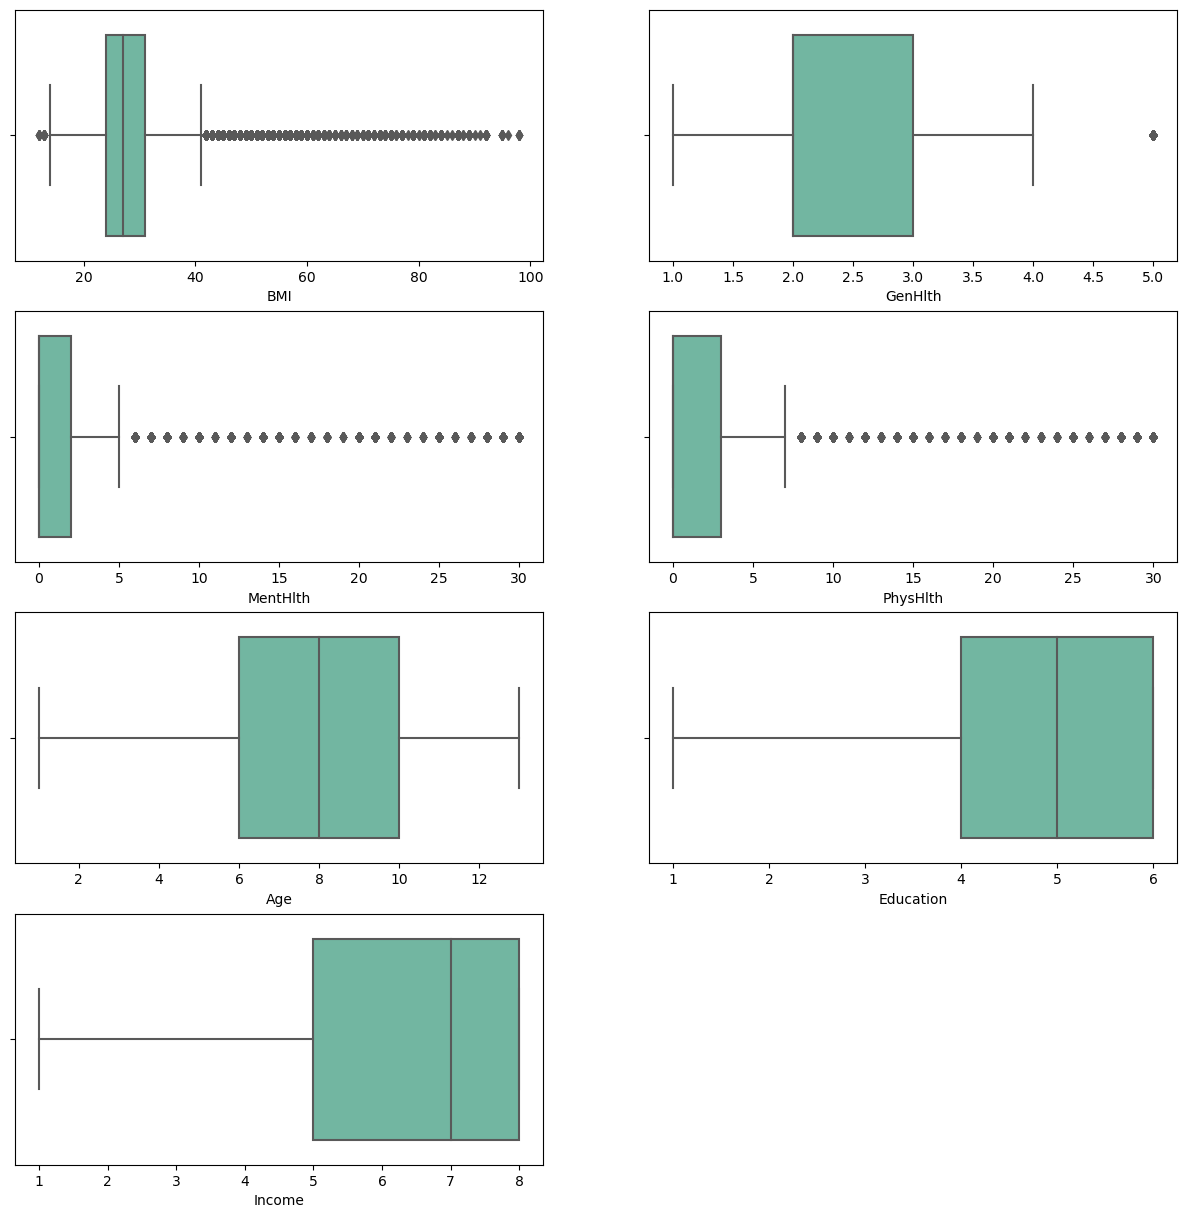

In [12]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

The above box plots are the the dataset's characteristics and informing subsequent analytical decisions which provide valuable insights into the spread and central tendencies of each variable. For instance, examining the BMI box plot reveals the distribution of body mass index values, highlighting any outliers and the variability within the dataset. 

Similarly, the plots for age and education showcase the range and distribution of these demographic factors, shedding light on any potential correlations with diabetes risk.

#### Counting the duplicated records

In [13]:
data.duplicated().sum()

24206

#### droping the duplicated records and saving the dataframe 

In [14]:
data.drop_duplicates(inplace = True)

#### verifying that no duplicated records present after drop in the dataframe

In [15]:
data.duplicated().sum()

0

#### Displaying number of features and records

In [16]:
data.shape

(229474, 22)

#### this help us to show the categorical variable 

In [17]:

data2 = data.copy()

#### That help us to show the relation between features clearly


In [18]:

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/1795149115.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/1795149115.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.HighBP[data2['HighBP'] == 0] = 'No High'
/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/1795149115.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [19]:
data2.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Excellent,18,15,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Excellent,30,30,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Fair,0,0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Fair,3,0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


## EDA

In [20]:
# Handle non-numeric data (e.g., one-hot encoding for categorical variables)
# data_numeric = pd.get_dummies(data)

#### using heatmap to understand correlation better in dataset data  
#### Heatmap of correlation

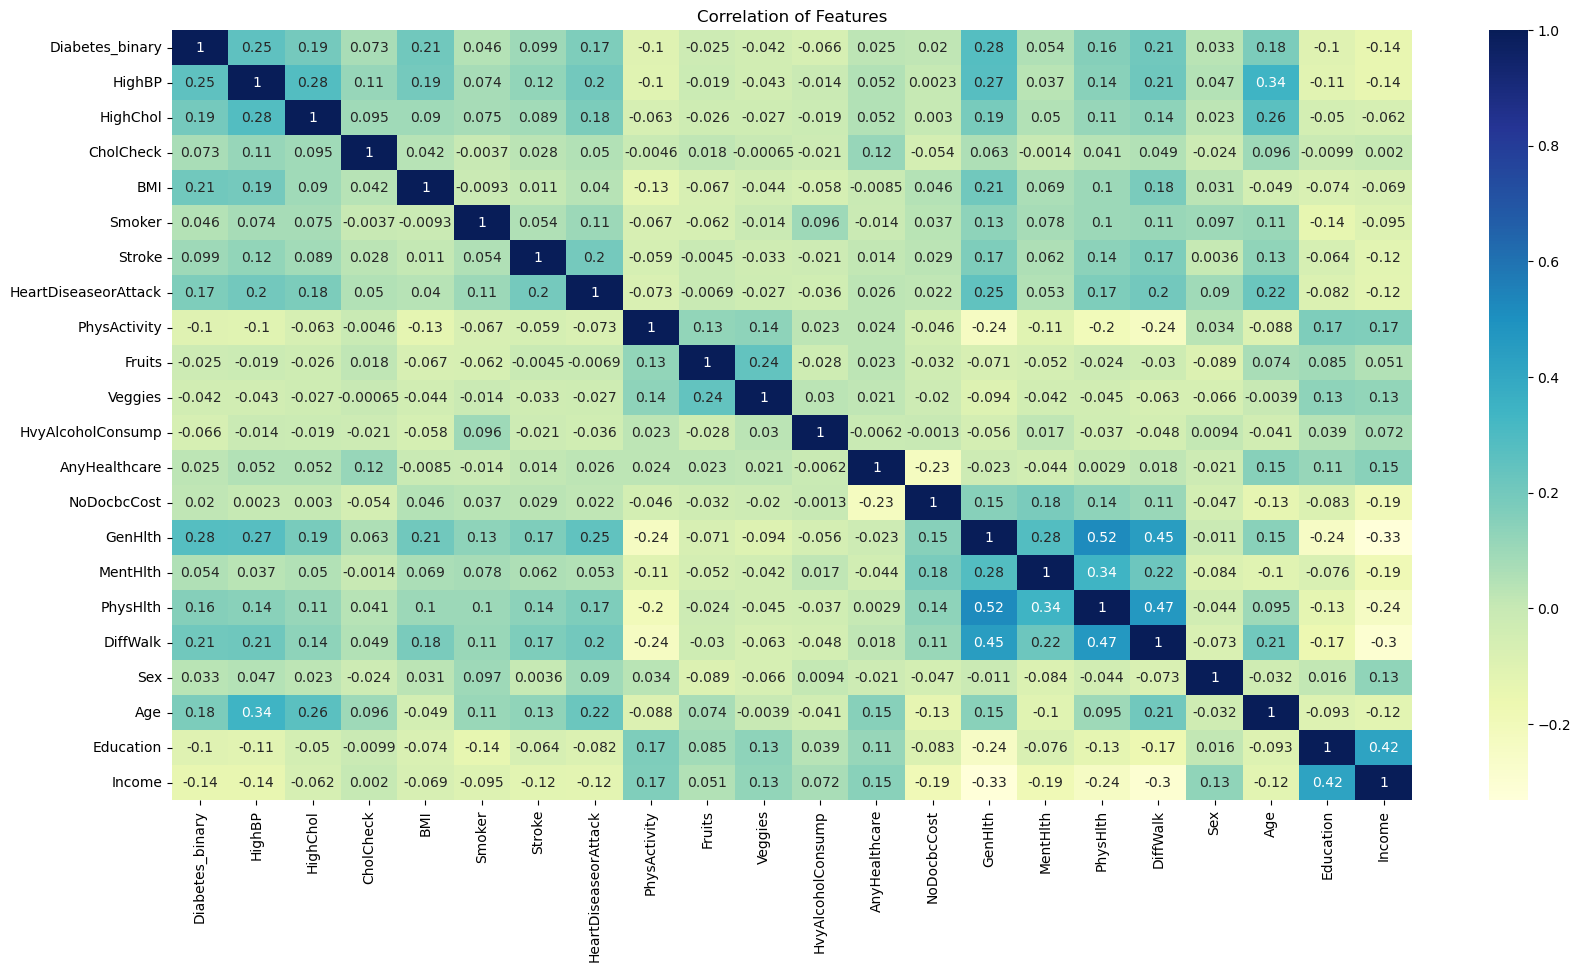

In [21]:

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation of Features")
plt.show()

The above heatmap generated from the correlation matrix helps to understand the relationships between different features in the dataset. Each feature represents a variable such as BMI, General Health (GenHlth), Mental Health (MentHlth), Physical Health (PhysHlth), Age, Education, and Income.
The Darker colors mean two things tend to go up or down together, like BMI and Age increasing together. Lighter colors mean they tend to move in opposite directions, such as Education going up while Income goes down. When you see colors close to white, it means there's not much of a connection between those things.

#### Using histogram to understand dataset data better

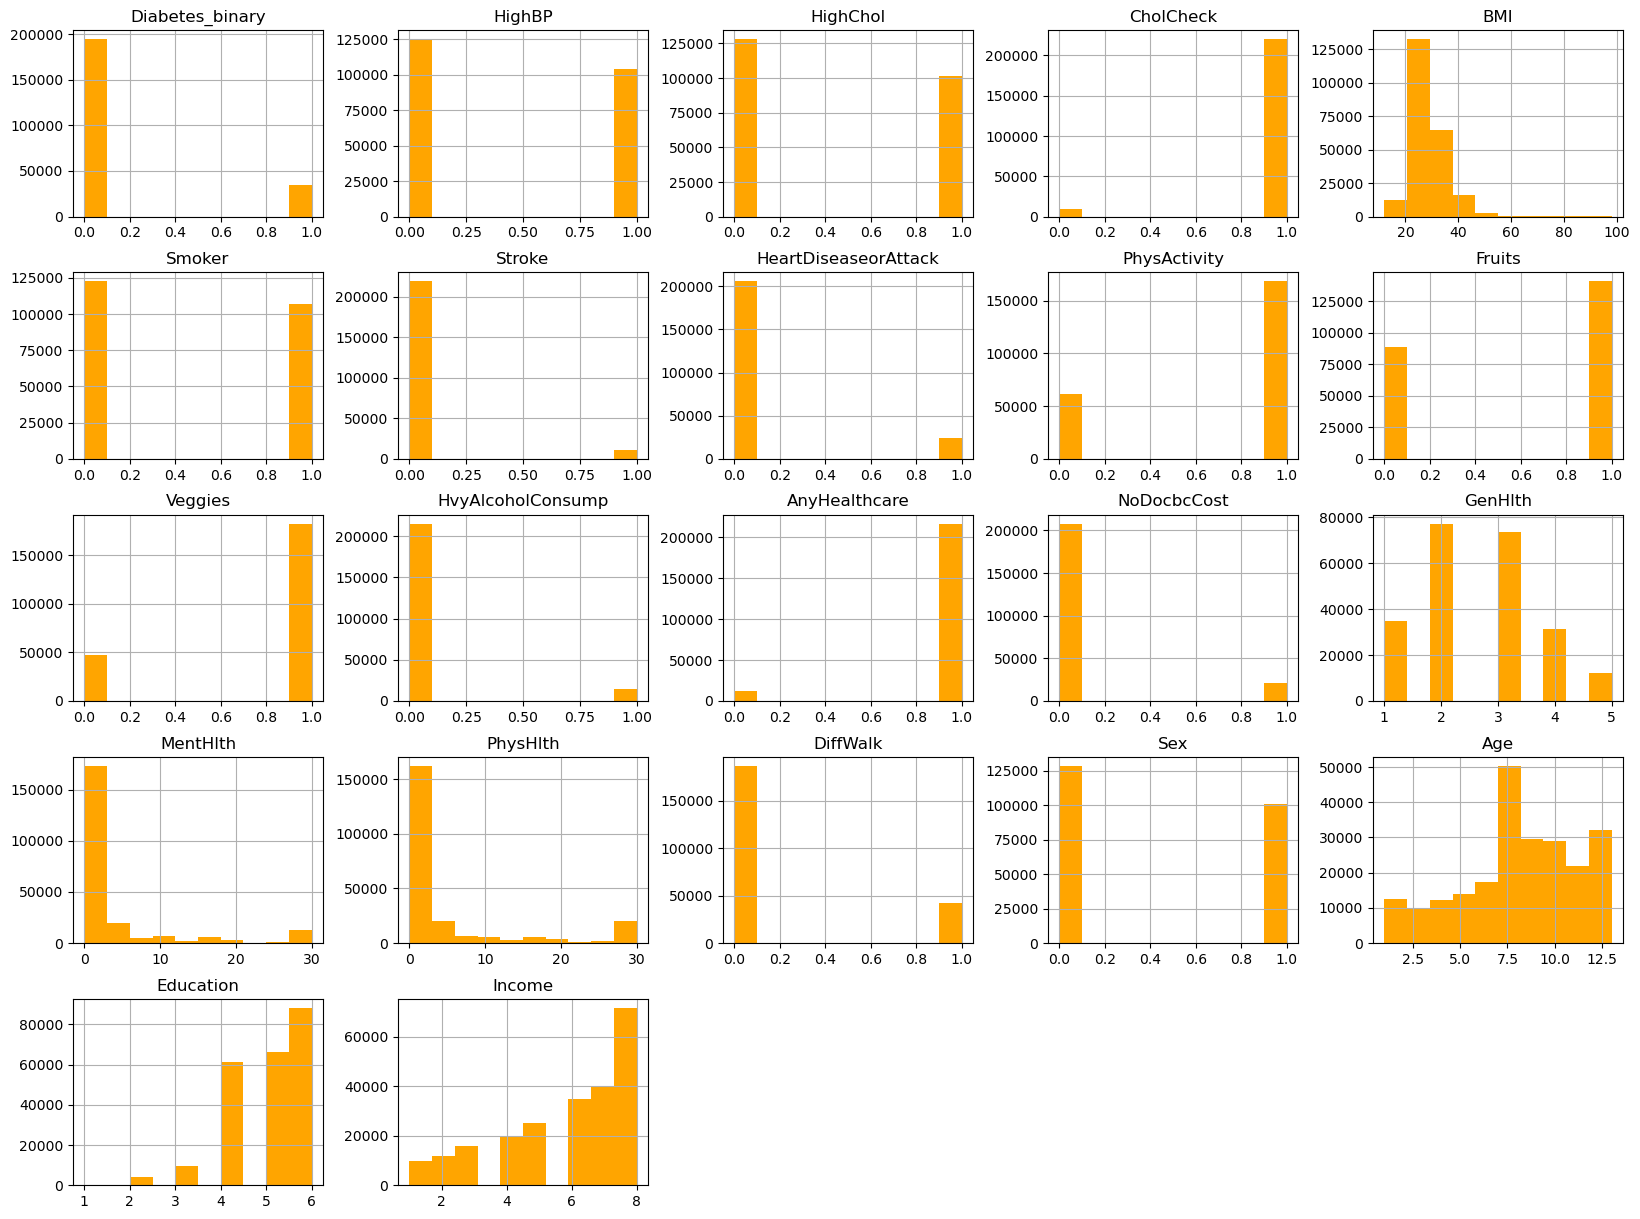

In [22]:
data.hist(figsize=(20,15), color='orange');

These above histograms shows how the data is spread out and how common certain values are, which helps us learn more about the dataset.
these are the visual representations of the distribution of different variables. 
For example, if one of the variables is age, the histogram would show how many people fall into each age group. This helps us see if the ages are evenly distributed or if there are more people in certain age ranges, giving us insights into the demographic makeup of the dataset. 
Similarly, for other variables like income or education level, the histograms show us the frequency of different income or education categories, helping us understand the socioeconomic characteristics of the dataset. 


#### Visualization Of [Yes - NO] Columns and their relation with the target



In [23]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

#### This function can be particularly useful for visualizing the distribution of binary outcomes (like having or not having diabetes) across different categories or ratings (such as age groups, BMI categories, etc.)

In [24]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/267341749.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


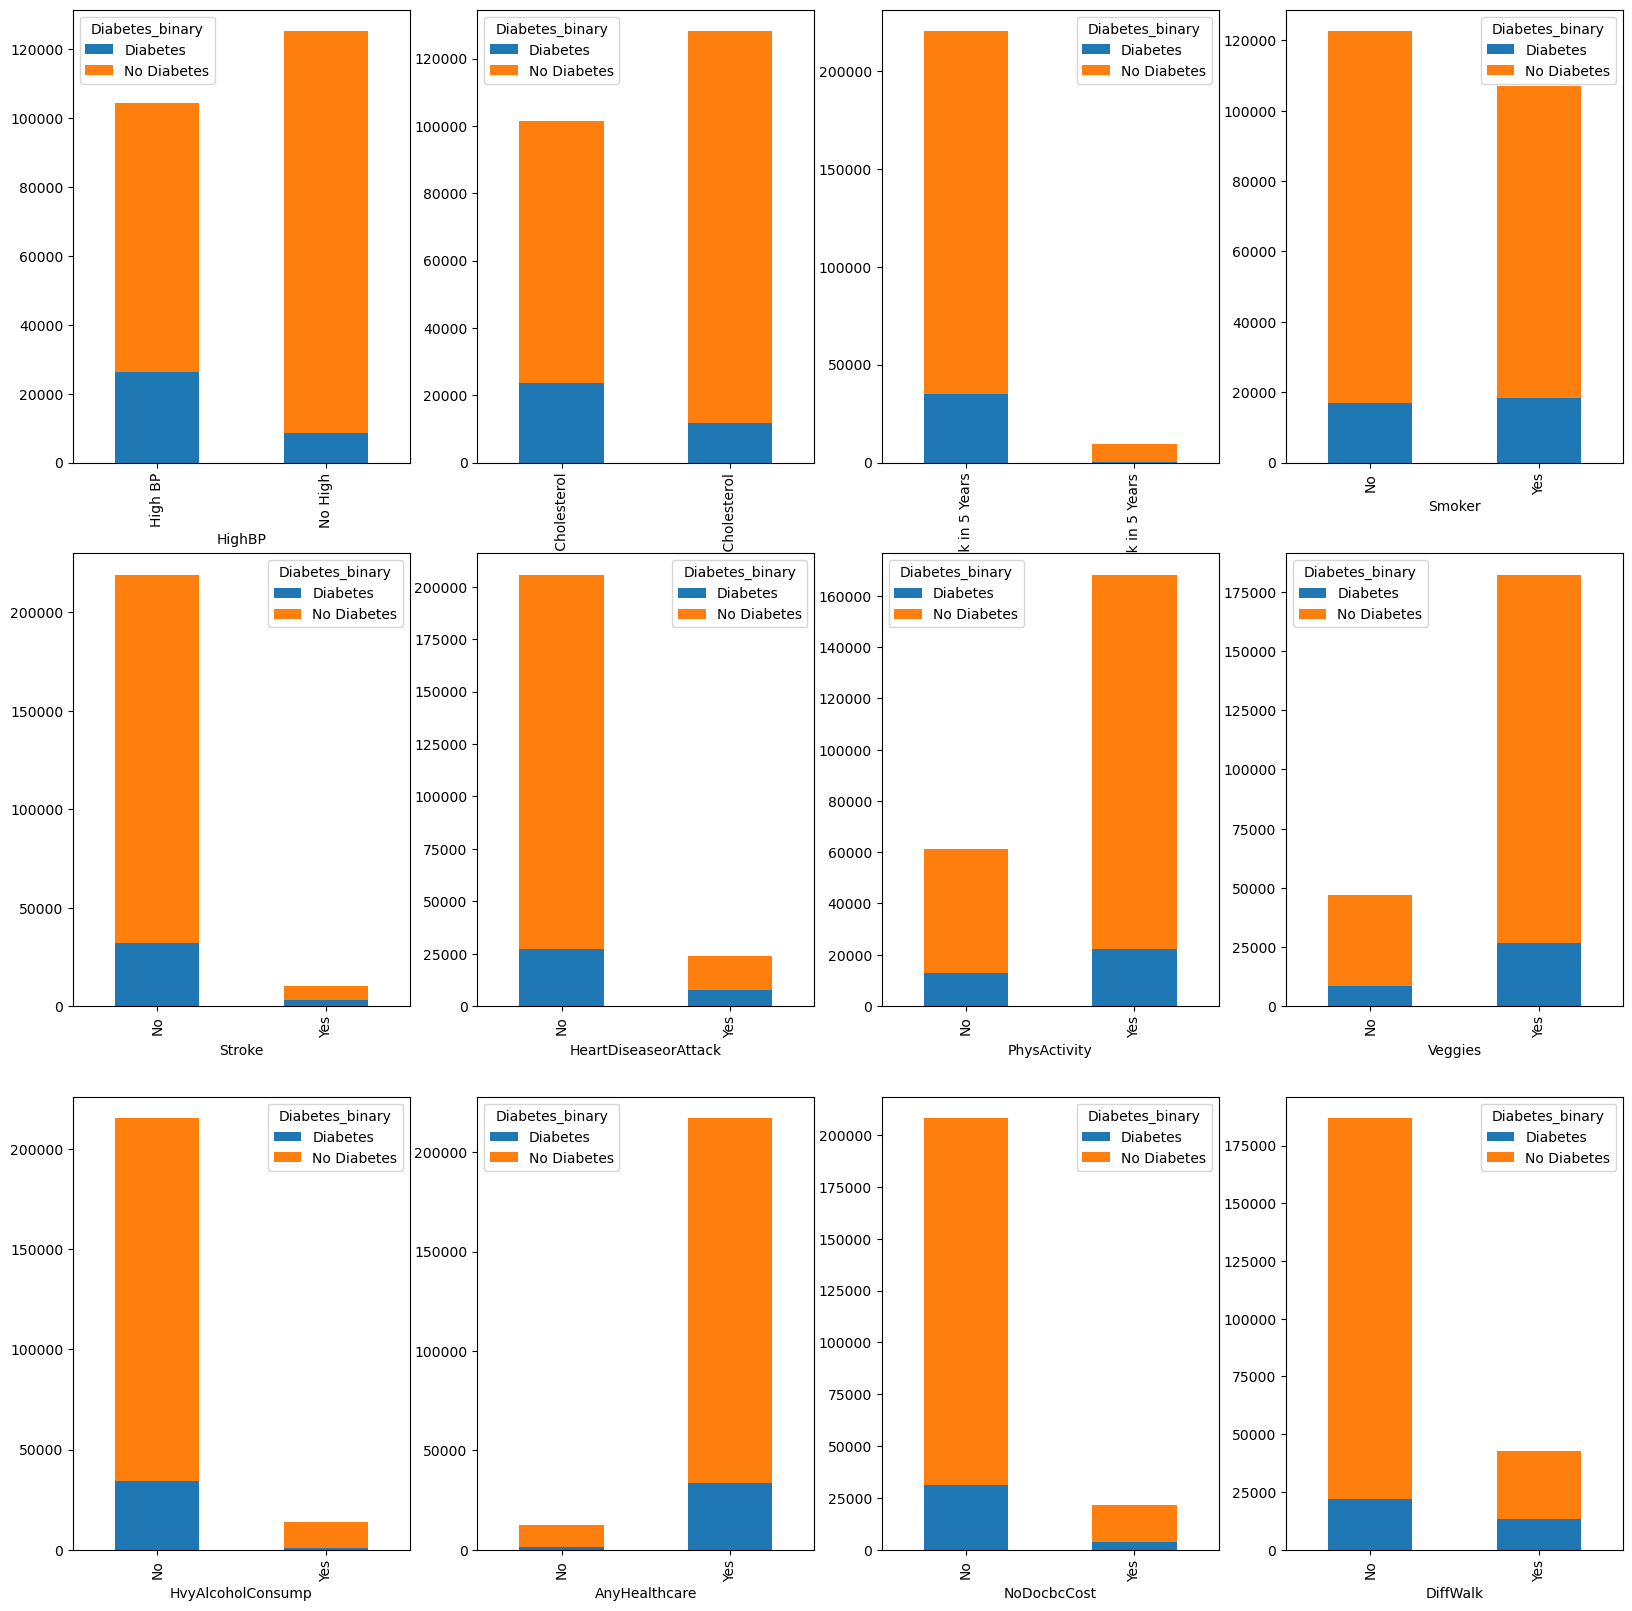

In [25]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

This chart shows how different factors relate to whether someone has diabetes or not. Each small chart looks at one factor, like high blood pressure or being physically active. The orange bars represent people with diabetes, and the blue bars represent people without diabetes.

The height of the bars shows how many people fall into each category for that factor. By comparing the orange and blue bar heights, you can see if having that factor (like high blood pressure) makes diabetes more or less common.

For example, the "HighBP" chart shows that more people with high blood pressure have diabetes compared to those without high blood pressure. This suggests high blood pressure could be a risk factor for diabetes. The charts allow you to easily visualize patterns like this for the different factors included in the data.

#### analyzing target values "Daibetes_binary"
#### average of column Daibetes_binary 
#### 0 for non-Diabetic person and 1 for Diabetic person


In [26]:
data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

#### verifying the value count of Diabetes_binary_str by utilizing countplot
#### pieChart representation of the  people average diabetic and non diabetic 


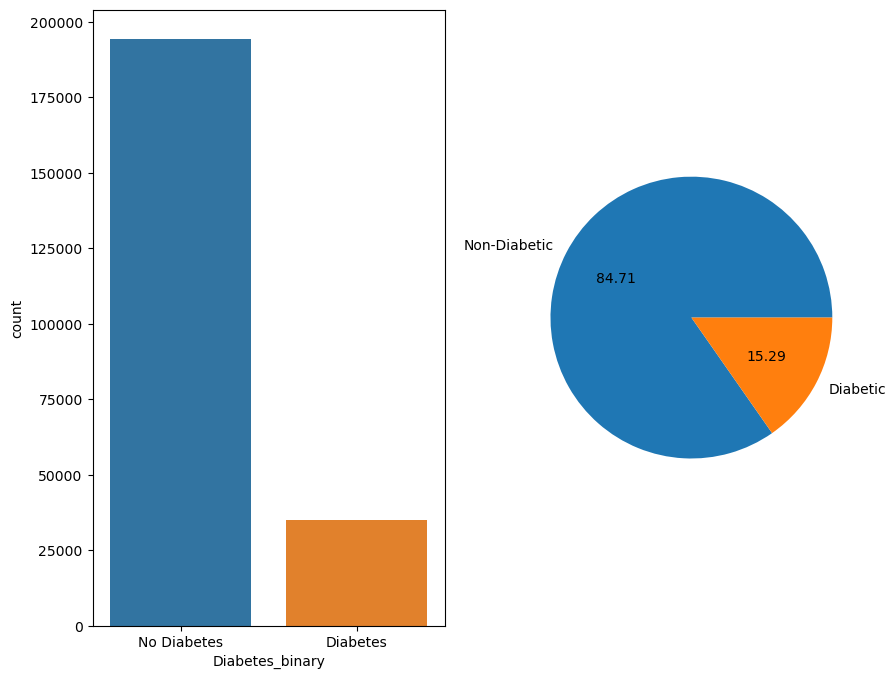

In [27]:
figure1, plot1 = plt.subplots(1, 2, figsize=(10, 8))
sns.countplot(data=data2, x='Diabetes_binary', ax=plot1[0])



labels = ["Non-Diabetic", "Diabetic"]
plt.pie(data2["Diabetes_binary"].value_counts(), labels=labels, autopct='%.02f')
plt.show()

The above bar chart showing the count of individuals with diabetes (orange bar) and without diabetes (blue bar). The y-axis represents the count, and the x-axis represents the diabetes status. The blue bar is significantly taller, indicating that the number of individuals without diabetes is much larger than those with diabetes in the dataset.

The above Pie chart blue portion of the pie represents 84.71% of the individuals, who are non-diabetic, while the orange portion represents 15.29% of the individuals, who have diabetes.

It is evident that there are more healthy individuals than diabetics

#### The feature "Age" and it's relation with the target



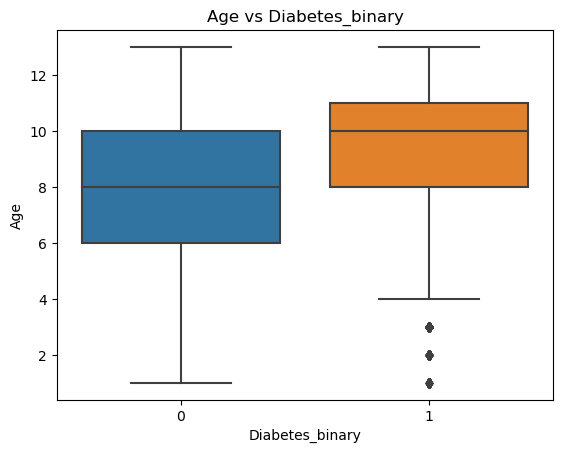

In [28]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary')
plt.show()

The above figure shows the distribution of ages for individuals with and without diabetes in the dataset.
The x-axis represents the diabetes status ('Diabetes_binary'), with two categories: 0 for individuals without diabetes and 1 for individuals with diabetes. The y-axis represents the age of the individuals.

Each box in the plot shows the distribution of ages for the corresponding diabetes status. The box itself represents the interquartile range, with the horizontal line inside the box indicating the median age. The whiskers extending from the box illustrate the range of ages, excluding outliers.

#### Bar chart that illustrates the amount of diabetes cases in various age groups.
#### To compare the incidence of diabetes across age groups, the 'crosstab' function creates a frequency table.

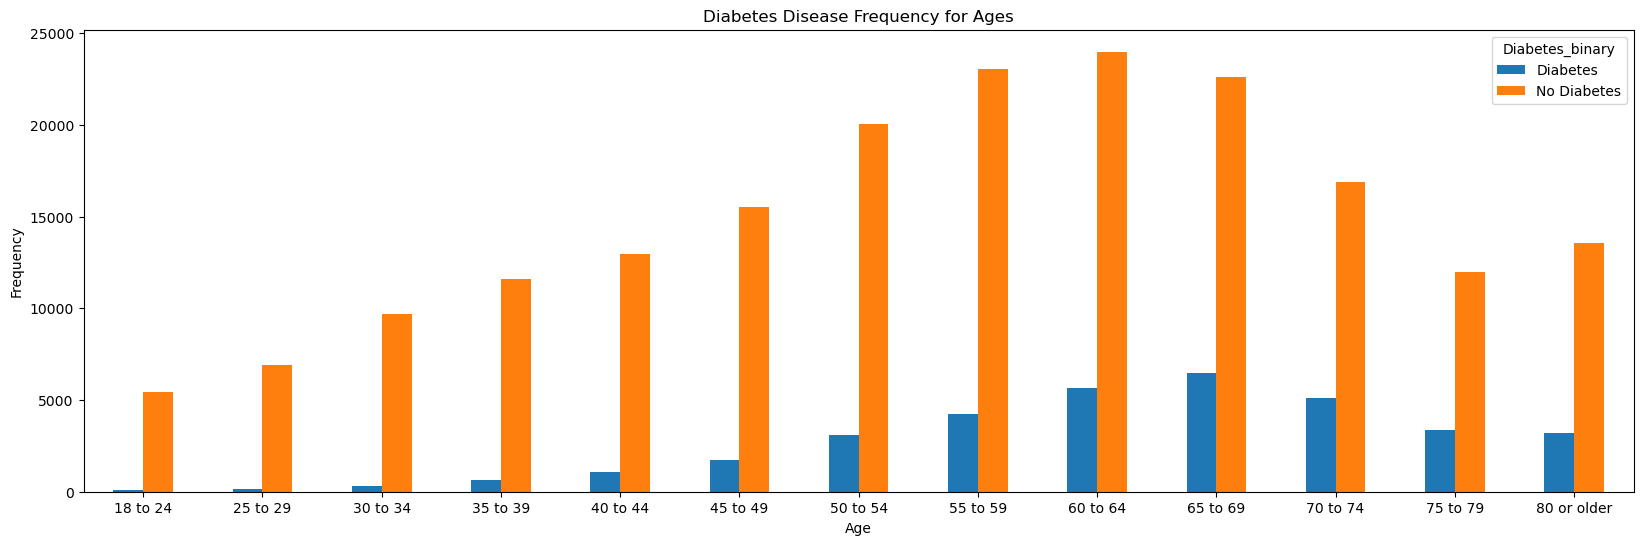

In [29]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))

# Set the title of the plot
plt.title('Diabetes Disease Frequency for Ages')

# Label the x-axis as 'Age'
plt.xlabel('Age')

# Set the rotation of x-axis labels to 0 degrees for better readability
plt.xticks(rotation=0)

# Label the y-axis as 'Frequency' to indicate the count of cases
plt.ylabel('Frequency')

# Display the plot
plt.show()

This above bar plot to show how diabetes is distributed among different age groups in the dataset. Each bar represents an age group, and the height of the bar indicates how many people in that age group have diabetes. The plot helps us understand the relationship between age and the likelihood of having diabetes.

We are aware that the likelihood of developing diabetes often rises with age. As we can see from the above, the median age of those with diabetes is higher than that of those without the disease.



#### The feature "Education" and it's relation with the target
#### Compare the education levels of diabetic and non-diabetic groups, as well as the configuration of the plot's aesthetics and elements.

/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/1480068024.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Education[data.Diabetes_binary == 0], color="blue", label="No Diabetic" )
/var/folders/4j/834bz1_d3bzg327cwzjmlp1c0000gn/T/ipykernel_17133/1480068024.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

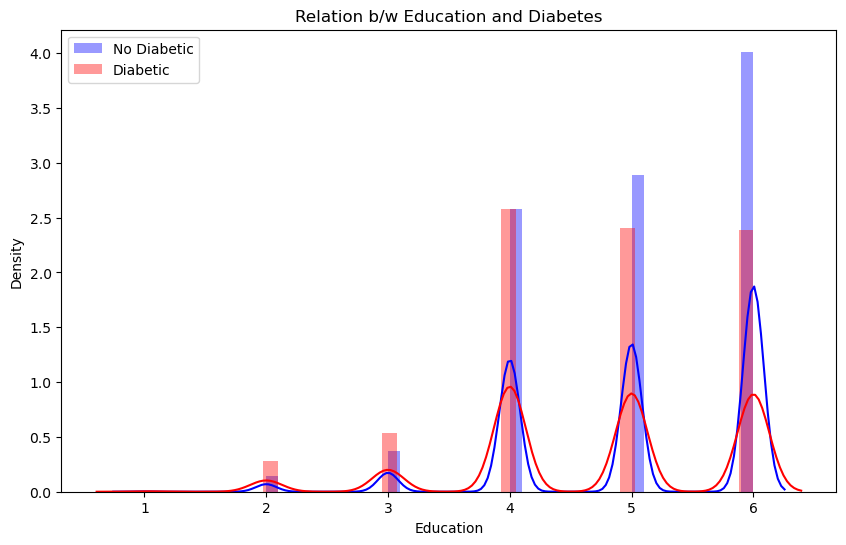

In [30]:
# Plotting distribution plots for the 'Education' feature categorized by diabetes status

plt.figure(figsize=(10,6))
sns.distplot(data.Education[data.Diabetes_binary == 0], color="blue", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="red", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

This above figure shows two overlaid distribution plots showing the distribution of education levels among people categorized by their diabetes status. The blue plot represents individuals without diabetes, while the red plot represents those with diabetes.

By comparing the shapes of these plots, we can see how education levels are distributed differently among people. This gifure helps us understand if there's any realtion between education level and diabetes status in our dataset.

#### It is evident that the majority of people have advanced degrees, and among those with advanced degrees, there are more healthy individuals than not.

The feature "income" and it's relation with the target

/Users/hemangiahire/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

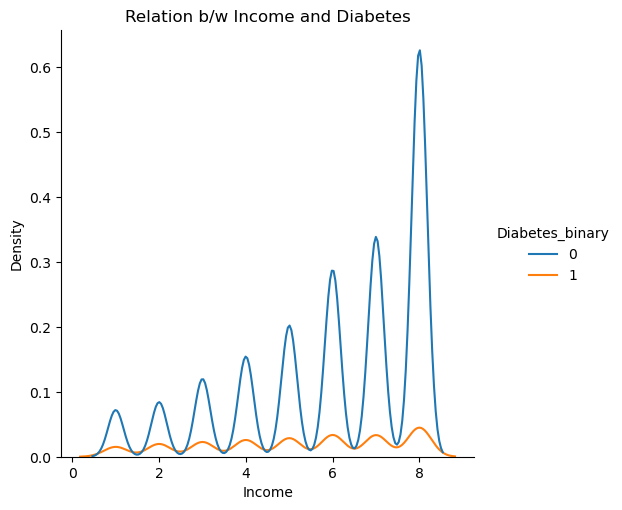

In [31]:

plt.figure(figsize=(20,10))
sns.displot(data=data, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes")

The association between diabetes and income in our dataset is depicted in the above graph. The plot displays the distribution of income values for individuals with and without diabetes. It is a kernel density estimation (KDE) plot. Income levels are shown on the x-axis, and the density of people at each income level is shown on the y-axis. 
We are able to visually examine the income distributions between the two groups since the plot is coloured according to the presence or absence of diabetes in the individuals. We can see how income may be related to the occurrence of diabetes in our dataset by looking at the greater peaks in the plot, which indicate the number of people at that income level.

#### We observe that a majority of individuals have a higher income, and among those with higher incomes, the proportion of healthy people surpasses that of those with diabetes.

The feature "BMI" and it's relation with the "target"

In [32]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-null  

#### Displays a count plot for the Body Mass Index (BMI) distribution among individuals, segmented by their diabetes status. 

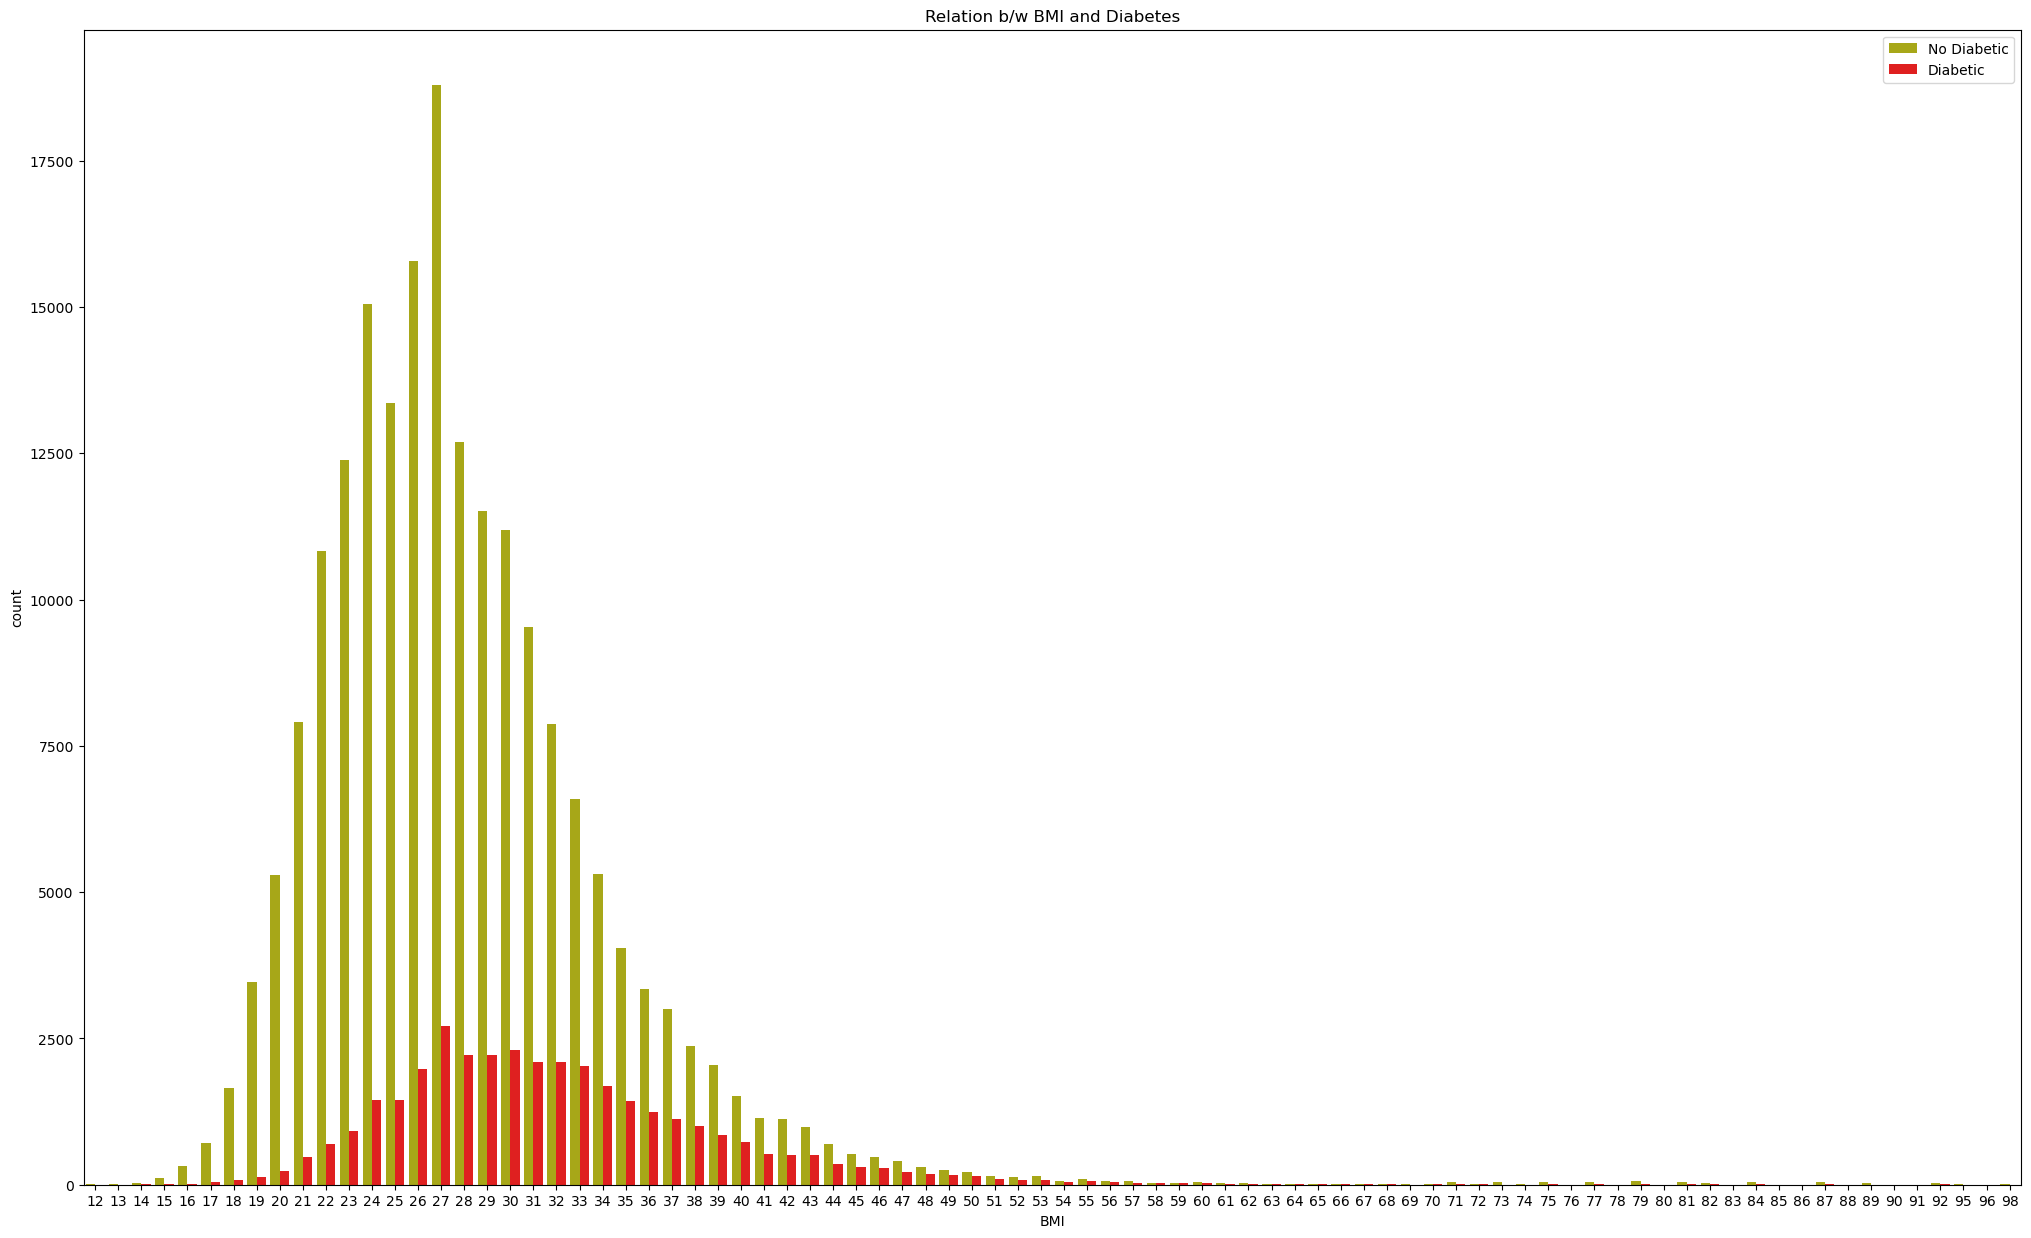

In [34]:
plt.figure(figsize=(25, 15))

sns.countplot(x='BMI', hue='Diabetes_binary', data=data, palette=['y', 'r'])
plt.title("Relation b/w BMI and Diabetes")
plt.legend(labels=['No Diabetic', 'Diabetic'])


The association between body mass index (BMI) and diabetes in the dataset is depicted in the above figure. It makes use of a countplot, which counts the instances of various BMI values and divides them according to the presence or absence of diabetes (as shown by the 'Diabetes_binary' column). The palette parameter designates two colours for each category: red for those with diabetes and yellow for those without. Which colour corresponds to which group is made clear by the legend labels. Overall, this plot makes it easier for us to understand how diabetes risk is related to BMI.

The feature "MentHlth" and it's relation with the "target"

#### Replacing 0 into Non-Diabetic and 1 into Diabetic 
#### Adding new column Diabetes_binary_str 

In [35]:
data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

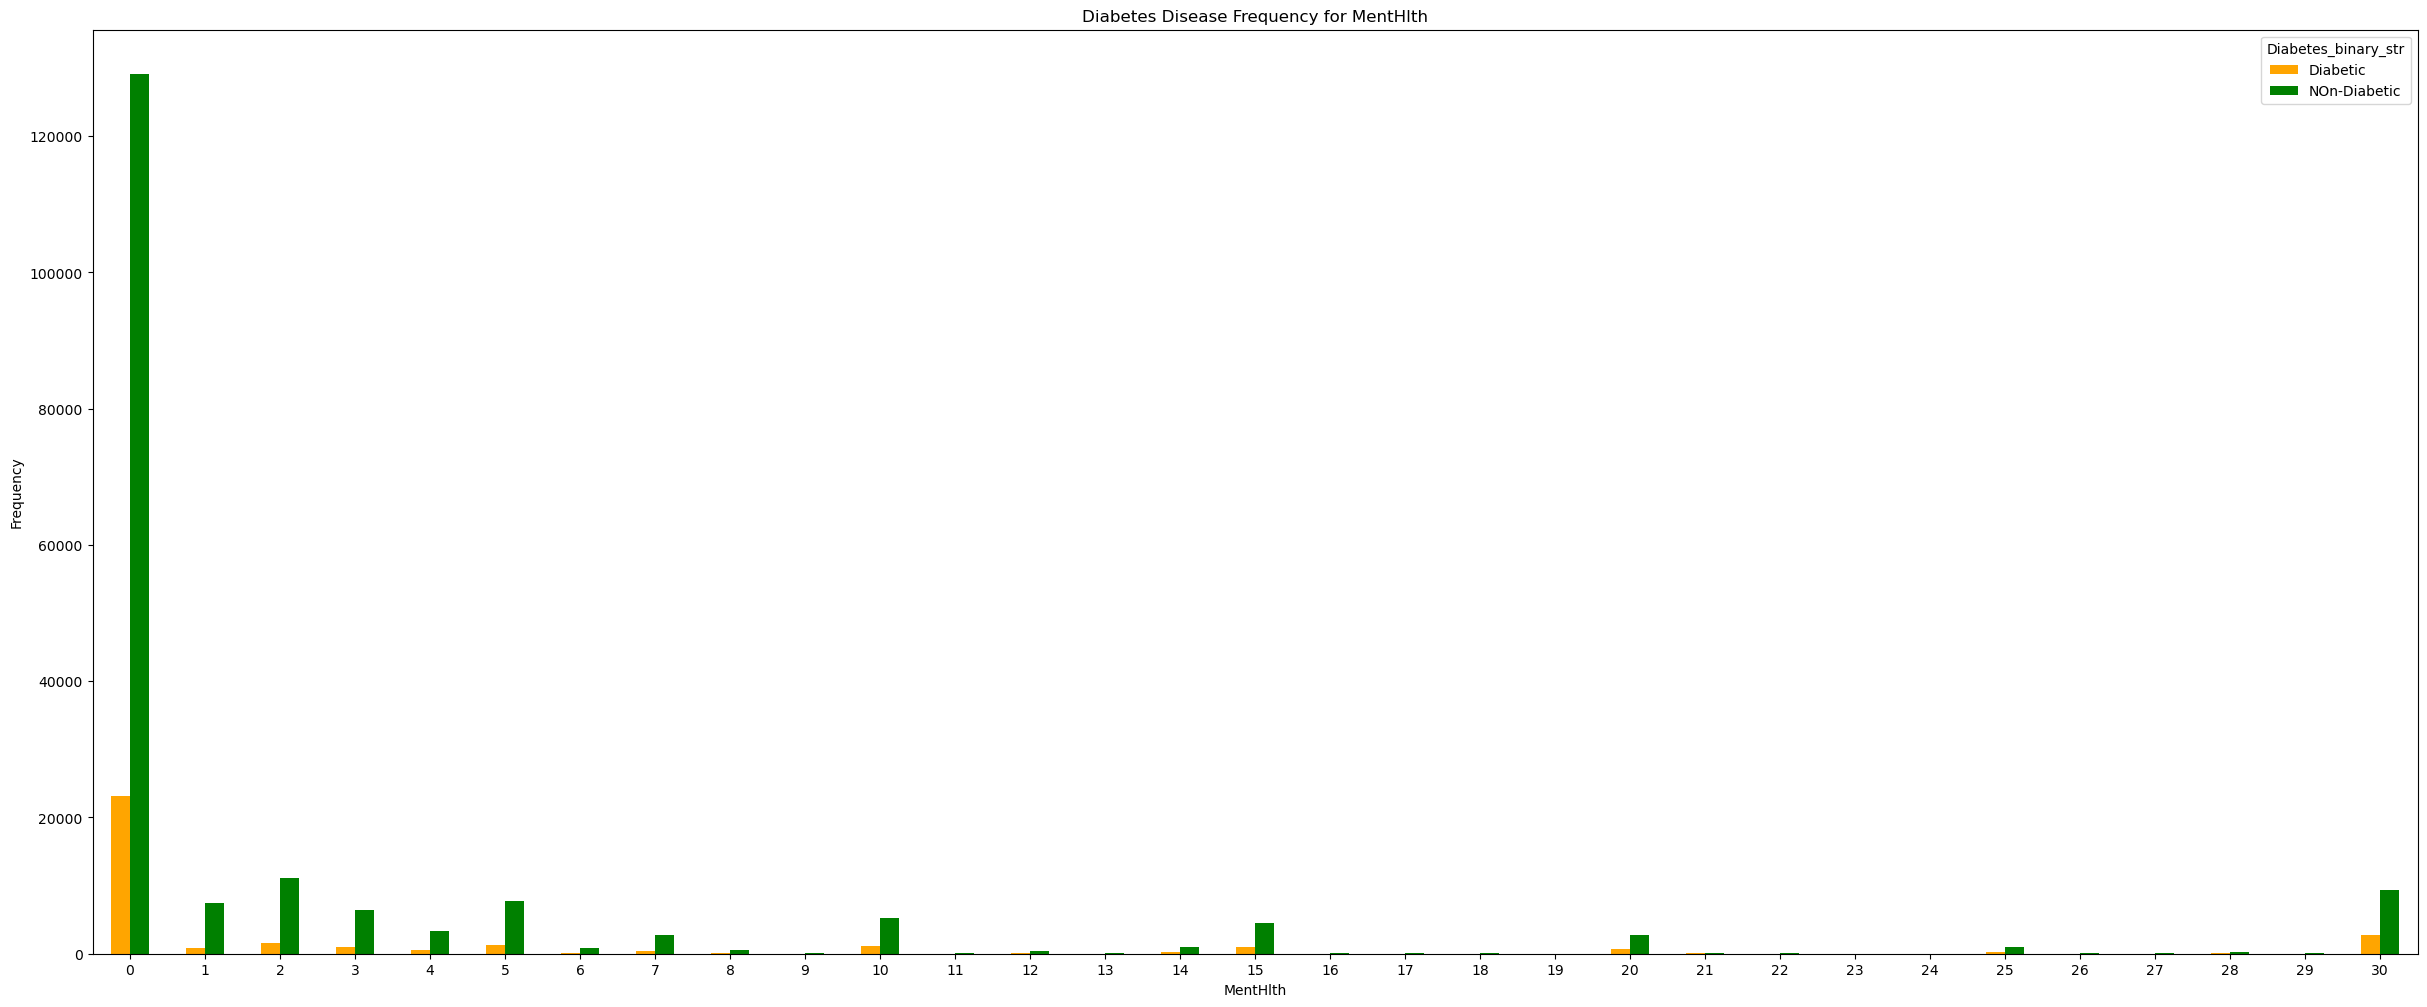

In [36]:
# Visualize the frequency of diabetes among different mental health status groups

pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['orange', 'green' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

The frequency of diabetes in individuals with varying mental health conditions is compared in the bar chart above. A mental health status group is represented by each bar, and the height of the bar indicates the proportion of individuals with diabetes or not.We can investigate whether diabetes and mental health are related. For instance, if one group's bar is taller than another's, it may indicate a connection between diabetes and mental health. This graphic aids in our visual understanding of these interactions, which is crucial for deriving conclusions from our dataset analysis.

#### According to the figure, Menthlth Group 0–5 has an effect on Diabetic

The feature "PhysHlth" and it's relation with the target

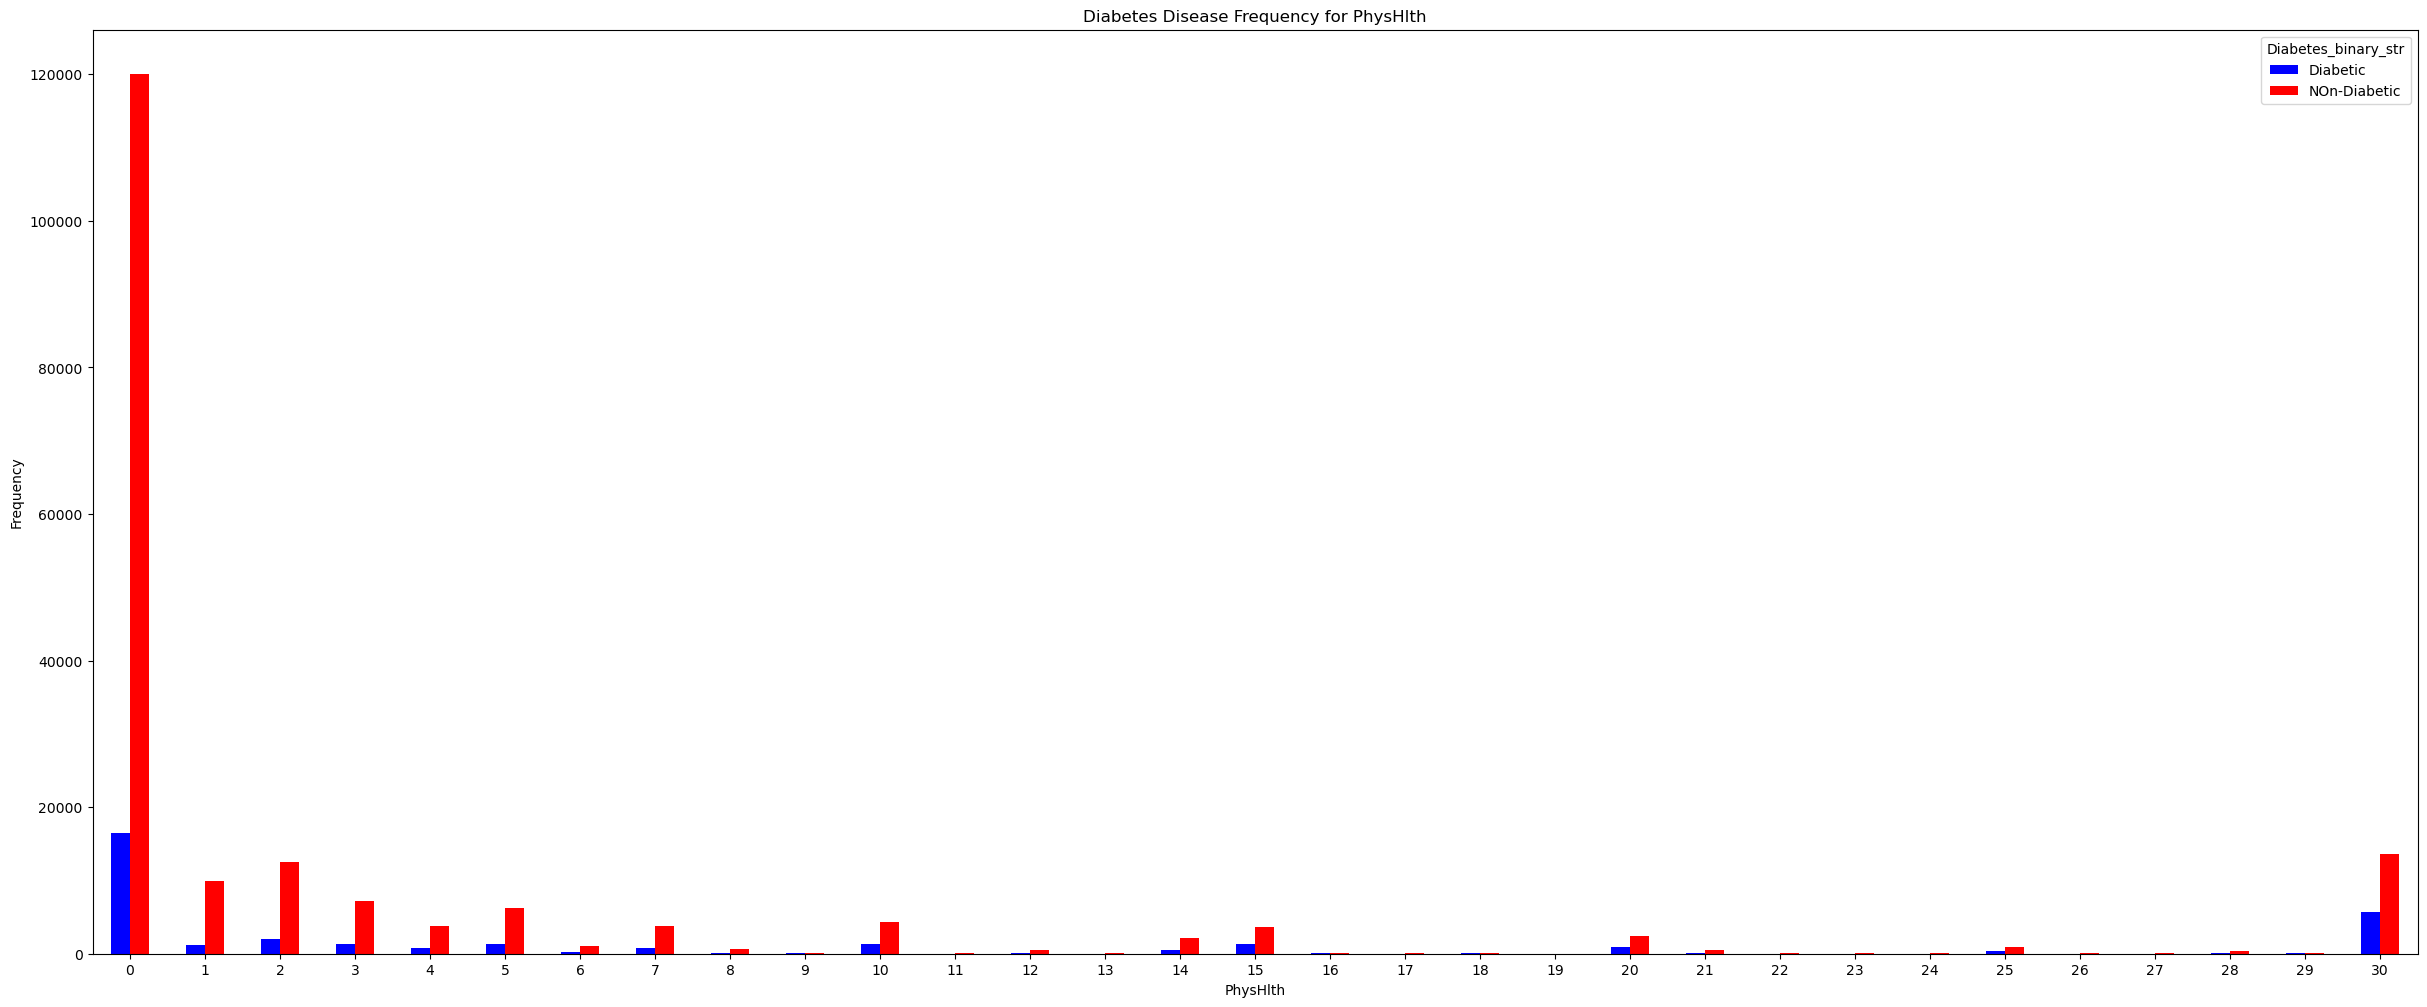

In [37]:
# Visualize the frequency distribution of physical health statuses among diabetic and non-diabetic individuals

pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

The physical health statuses of the individuals in the bar chart above are compared according to whether or not they have diabetes. Different levels of physical health are represented by the x-axis, while frequency of occurrence is shown by the y-axis. The bars are color-coded: red indicates diabetes, while blue indicates non-diabetes. We can better grasp how these two groups' physical health statuses differ from one another in the dataset thanks to this visualisation.

#### According to the figure, PhysHlth Groups 0–5 have an effect on diabetic

The feature "GenHlth" and it's relation with the target

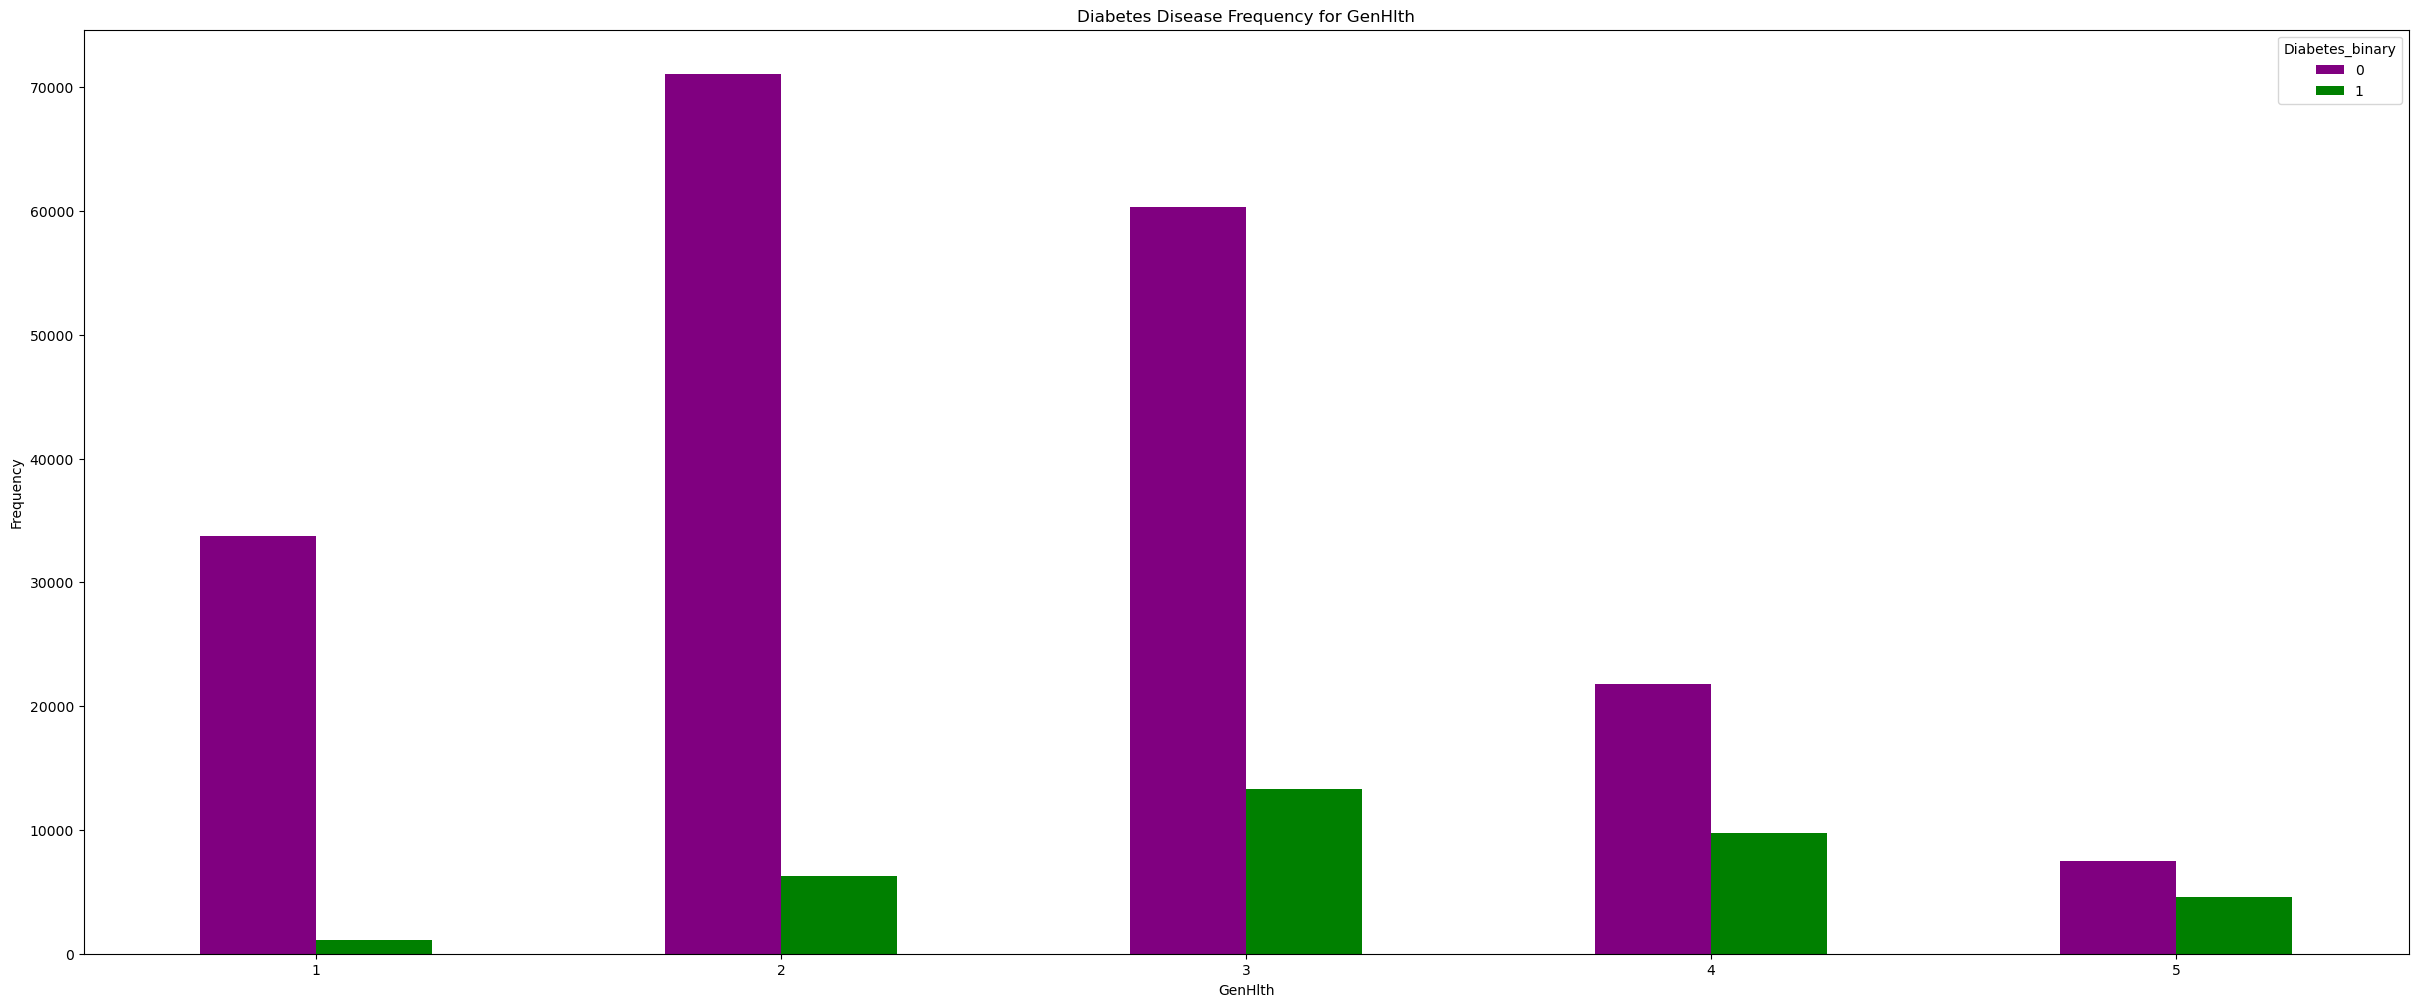

In [38]:
# Visualize the frequency of diabetes across different general health ratings

pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

The bar graph above illustrates the prevalence of diabetes at various general health rating levels. Each bar represents a distinct general health rating; the height of the bars indicates the proportion of people with diabetes (green) and those without (purple) for each grade. It provides a means of graphically comparing the prevalence of diabetes at various overall health levels.

#### Relatively few individuals are rated as "5" and "4" in general health, yet these groups still include a significant number of diabetes cases!

# Feature Selections

With correlation

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

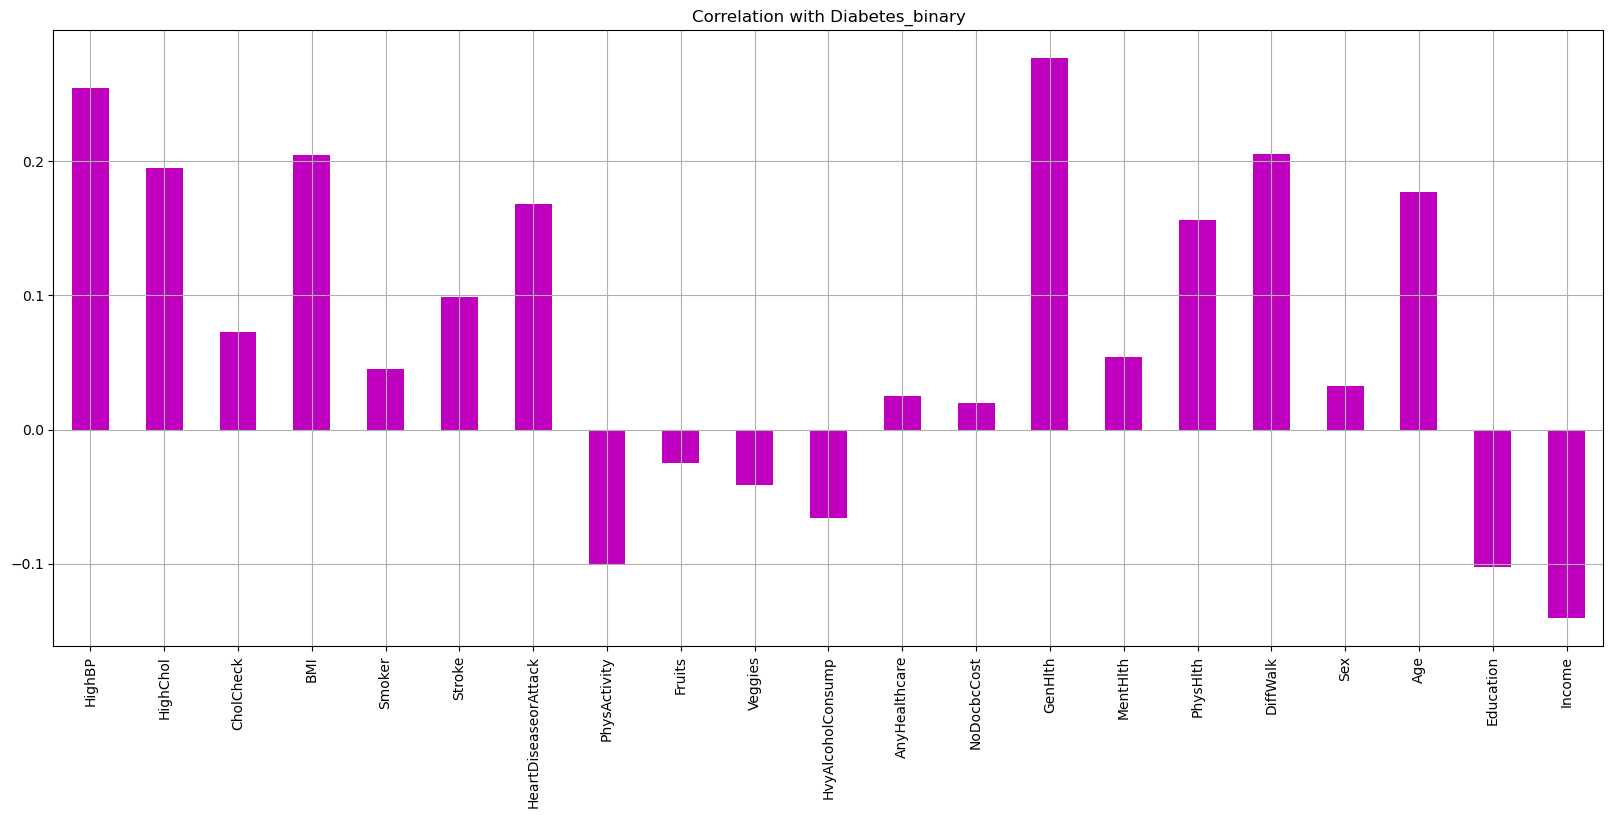

In [39]:
# First, select only numeric columns (excluding 'Diabetes_binary')
numeric_cols = data.drop('Diabetes_binary', axis=1).select_dtypes(include=[np.number])

# Now, calculate the correlation with 'Diabetes_binary'
correlation_series = numeric_cols.corrwith(data.Diabetes_binary)

# Finally, plot the correlation values
correlation_series.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary", color="m")


From our dataset, we only choose the columns containing numbers; we leave out the column that indicates whether a person has diabetes or not.
Next, we determine the relationship between each of these numerical columns and the "Diabetes_binary" column. This makes it easier to determine if a person has diabetes or not based on factors like age or BMI.
Lastly, we create a bar chart to visually represent these relationships. Each bar shows the degree to which a specific variable, such as age or BMI, is associated with the risk of developing diabetes. It is simple to identify which factors are potentially more significant in predicting diabetes with this chart.

## Diabetes_binary's relation with other columns Through bar Graph Result:

Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

# chi square

In [40]:
# Define independent variables X and dependent variable Y from the original dataset

# Exclude the first column which typically is the target variable
X = Original_data.iloc[:,1:]

# Take the first column as the target variable
Y = Original_data.iloc[:,0]

# Initialize SelectKBest with the Chi-squared statistic as the score function to select the top 10 features
BestFeatures = SelectKBest(score_func=chi2, k=10)

# Fit the SelectKBest object to the data
fit = BestFeatures.fit(X,Y)

# Create a DataFrame for the scores from the feature selection
# Extract scores (i.e., Chi-squared stats of features)
df_scores = pd.DataFrame(fit.scores_)

# Create a DataFrame from the columns of X
df_columns = pd.DataFrame(X.columns)

# Concatenate the two DataFrames for a better visualization of feature scores alongside their names
# Combine the feature names and their corresponding scores
f_Scores = pd.concat([df_columns,df_scores],axis=1)

 # Naming the columns of the DataFrame
f_Scores.columns = ['Feature','Score']

# Display the DataFrame with features and their scores to understand which features contribute most to predicting Y
f_Scores


,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [41]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


#### Incorporated those features  into our predictive model.

#### Drop these features "Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" 

In [42]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [43]:
data.drop(colomns , axis= 1 ,inplace=True)

# Data Splitting

In [44]:
# Prepare the feature set and target variable into X and Y for modeling
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalance

In [45]:
# Checking the value count of the target variable
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [46]:
# Applying NearMiss Algorithm to Address Imbalance
# Initialize NearMiss with version 1 and 10 neighbors to undersample the majority class
nm = NearMiss(version = 1 , n_neighbors = 10)

# Resample the dataset using NearMiss to balance the classes
# x_sm and y_sm are the resampled feature set and target variable, respectively
x_sm,y_sm= nm.fit_resample(X,Y)

In [47]:
# Display the new shape of the features and target after resampling and their distributions
print(y_sm.shape, x_sm.shape)

(70194,) (70194, 16)


In [48]:
# Print the count of each class in the resampled target variable to confirm balancing
print(y_sm.value_counts())

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64


In [49]:
# Splitting Data into Training and Testing Sets
# Use train_test_split to divide the data into training and testing sets
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

# Data scaling

In [50]:
# This scaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
scalar = StandardScaler()

# 'fit_transform' learns the scaling parameters (mean and variance) for the training data and applies the transformation in a single step.
X_train = scalar.fit_transform(X_train)

# Scale the test data
# This ensures that the scaling performed on the test data is identical to that performed on the training data.
X_test = scalar.fit_transform(X_test)

# Modelling


### Logistics Regression Model

In [51]:
# Initialize the Logistic Regression model
# 'max_iter=1500' sets the maximum number of iterations taken for the solvers to converge. 
lg = LogisticRegression(max_iter=1500)

# Fit the Logistic Regression model on the training data
lg.fit(X_train, Y_train)


LogisticRegression(max_iter=1500)

In [52]:
# Make predictions on test set using the trained logistic regression model
y_pred=lg.predict(X_test)


print('Logistic regression training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Logistic regression test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Logistic regression training set score: 0.8511
Logistic regression test set score: 0.8472


In [53]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Logistic regression Mean Squared Error : '+ str(mse))

rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Logistic regression Root Mean Squared Error : '+ str(rmse))


Logistic regression Mean Squared Error : 0.15276128970986277
Logistic regression Root Mean Squared Error : 0.39084688780884874


In [54]:
# Generate a classification report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



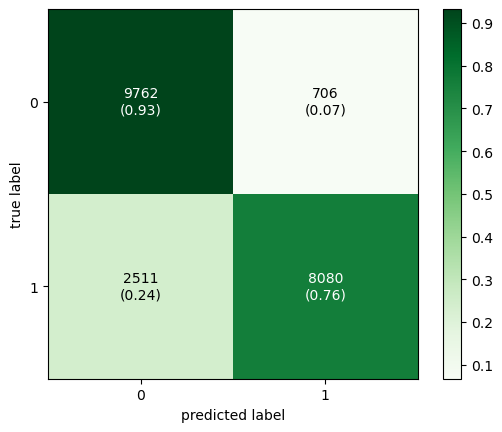

In [55]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                 cmap='Greens')
plt.show()

The above plot graph shows the performance in terms of true positive, false positive, true negative, and false negative predictions. 

# Decision Tree Model

In [56]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier( max_depth= 12)

# Fit the decision tree model to the training data
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [57]:
# Do predictions on test set
y_pred=dt.predict(X_test)

print('Decision Tree Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Decision Tree Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Decision Tree Training set score: 0.8657
Decision Tree Test set score: 0.8479


In [58]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Decision Tree Mean Squared Error : '+ str(mse))

rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Decision Tree Root Mean Squared Error : '+ str(rmse))


Decision Tree Mean Squared Error : 0.1520964908115295
Decision Tree Root Mean Squared Error : 0.3899955010144726


In [59]:
# Generate a classification report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10468
           1       0.95      0.74      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059



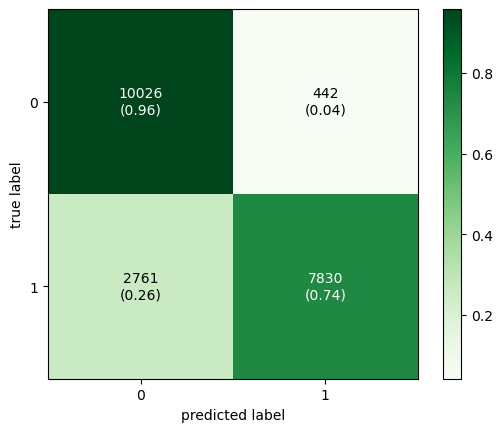

In [60]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

Provides detailed metrics such as precision, recall, and F1-score for each class (0 and 1) along with overall accuracy.To gauge the model's performance in terms of true positive, false positive, true negative, and false negative predictions, we analyse and display the confusion matrix. This aids in our comprehension of the model's accuracy in classifying events into the appropriate groups (diabetes or non-diabetes) and helps identify potential problem areas.

# KNN

In [61]:
# Initialize the KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors= 6 )

# Fit the KNeighbors model to the training data
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [62]:
# do predictions on test set
y_pred=knn.predict(X_test)

print('KNeighbors Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('KNeighbors Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

KNeighbors Training set score: 0.8423
KNeighbors Test set score: 0.8049


In [63]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('KNeighbors Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('KNeighbors Root Mean Squared Error : '+ str(rmse))

KNeighbors Mean Squared Error : 0.19507099102521488
KNeighbors Root Mean Squared Error : 0.44166841750935154


In [64]:
# Generate a classification report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10468
           1       0.93      0.66      0.77     10591

    accuracy                           0.80     21059
   macro avg       0.83      0.81      0.80     21059
weighted avg       0.83      0.80      0.80     21059



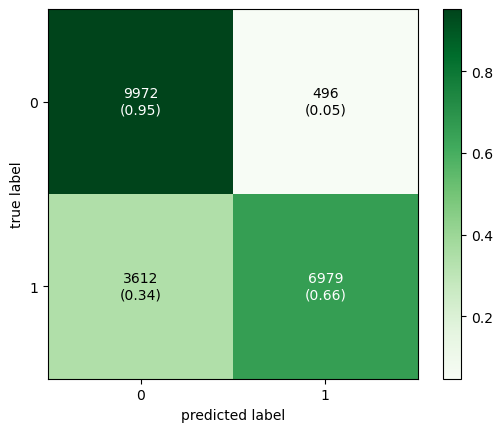

In [65]:
# Evaluating  and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

The above plot provides detailed metrics such as precision, recall, and F1-score for each class (0 and 1) along with overall accuracy.

This confusion matrix helps evaluate the performance of the KNN model by showing the distribution of true positive, true negative, false positive, and false negative predictions.


# XGBoost

In [66]:
# Initialize the XGBoost Classifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
# train the model
y_pred=xg.predict(X_test)

print('XGBoost Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('XGBoost Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

XGBoost Training set score: 0.8769
XGBoost Test set score: 0.8127


In [68]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('XGBoost Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('XGBoost Root Mean Squared Error : '+ str(rmse))

XGBoost Mean Squared Error : 0.18728334678759676
XGBoost Root Mean Squared Error : 0.4327624600027095


In [69]:
#Generate classification report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10468
           1       0.85      0.76      0.80     10591

    accuracy                           0.81     21059
   macro avg       0.82      0.81      0.81     21059
weighted avg       0.82      0.81      0.81     21059



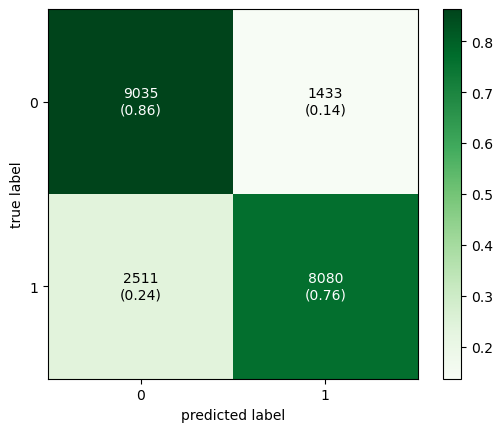

In [70]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

The above confusion matrix plot helps visualize the classifier's performance by illustrating the distribution of correct and incorrect predictions for each class (0 and 1). This aids in understanding the classifier's ability to correctly classify instances of diabetes and non-diabetes based on the provided features.

# SVM

In [71]:
# Initialize the SVM Classifier
# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('SVM Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('SVM Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

SVM Training set score: 0.8687
SVM Test set score: 0.8603


In [72]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('SVM Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('SVM Root Mean Squared Error : '+ str(rmse))

SVM Mean Squared Error : 0.13970273992117385
SVM Root Mean Squared Error : 0.37376829710553816


In [73]:
#Generate classification report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



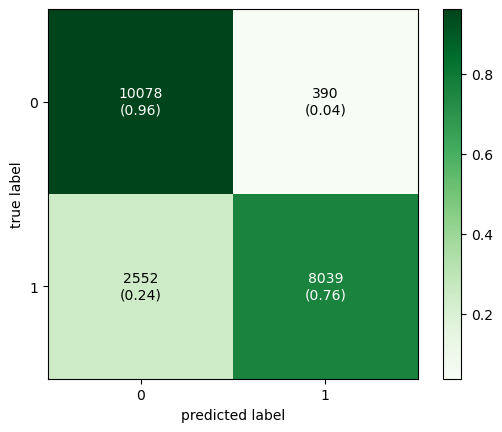

In [74]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

This confusion matrix helps evaluate the performance of the SVM model by showing the distribution of true positive, true negative, false positive, and false negative predictions.


# Random Forest

In [75]:
# Initialize the Random forest Classifier
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [76]:
# predictions on test set
y_pred=rf.predict(X_test)


print('Random forest Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Random forest Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Random forest Training set score: 0.8713
Random forest Test set score: 0.8588


In [77]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Random forest Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Random forest Root Mean Squared Error : '+ str(rmse))

Random forest Mean Squared Error : 0.14117479462462604
Random forest Root Mean Squared Error : 0.375732344395084


In [78]:
# Generate Classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10468
           1       0.94      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



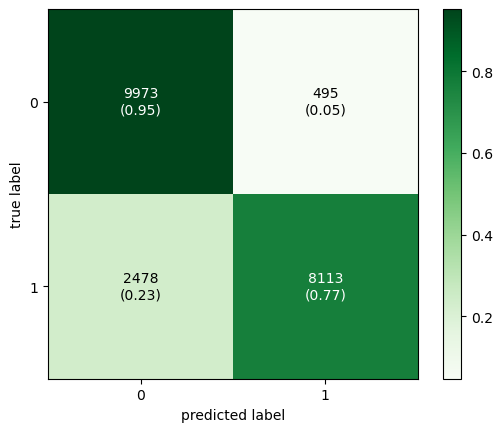

In [79]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

The above confusion matrix helps evaluate the performance of the Random Forest model by showing the distribution of true positive, true negative, false positive, and false negative predictions.


## Hyperparameter Tuning

In [80]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, Y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)


Best parameters set found on development set:
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [81]:
rf_tuning = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200, random_state=42)
rf_tuning.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [82]:
y_pred = rf_tuning.predict(X_test)


In [83]:
# And when you want to report the performance, use the best parameters found
print('Random forest after Tuning Training set score: {:.4f}'.format(rf_tuning.score(X_train, Y_train)))
print('Random forest after Tuning Test set score: {:.4f}'.format(rf_tuning.score(X_test, Y_test)))

Random forest after Tuning Training set score: 0.8945
Random forest after Tuning Test set score: 0.8635


In [84]:
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
print('Random forest after Tuning Mean Squared Error:', mse)
print('Random forest after Tuning Root Mean Squared Error:', rmse)


Random forest after Tuning Mean Squared Error: 0.13652120233629328
Random forest after Tuning Root Mean Squared Error: 0.36948775667983


In [85]:
# Generate Classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10468
           1       0.94      0.78      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



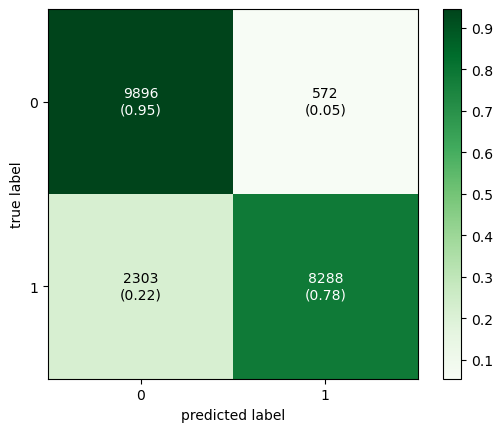

In [86]:
# Evaluating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Greens')
plt.show()

The above plot generated after hyperparameter tuning displays a confusion matrix. This matrix is a visual representation of the model's performance, particularly in terms of how it classifies instances into different categories by showing the distribution of true positive, true negative, false positive, and false negative predictions.

## Conclusion

The project successfully implemented several machine learning models to predict diabetes from health indicators. The Random Forest model, in particular, demonstrated robust performance. Insights drawn from the models can assist healthcare professionals in identifying individuals at higher risk of diabetes.